# Cell turnover and anisomycin analyses 

This notebook contains analyses related to cell turnover, how it relates to learning, and how anisomcyin disrupts cell turnover.

In [1]:
# Import useful modules
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

Add repositories to path so you can use them for analyses. There has to be a better way to do this.

In [2]:
import sys
sys.path.append(r'C:\Users\Nat\Documents\BU\Imaging\Python\Eraser')
sys.path.append(r'C:\Users\Nat\Documents\BU\Imaging\Python\FearReinstatement')
%load_ext autoreload
%autoreload 2

Import and set up group data class

In [3]:
import placefield_stability
pfg = placefield_stability.GroupPF()
pfg._load()
groups = [pfg.nlmice, pfg.lmice, pfg.amice]

First, recapitulate results that turnover BETWEEN arenas predicts learning (higher turnover = better discrimination/learning)

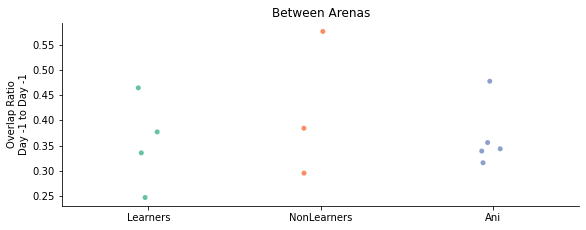

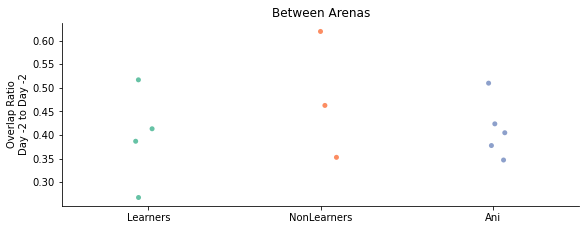

In [4]:
pfg.turnover_scatter(-1, -1, within_arena=False)
pfg.turnover_scatter(-2, -2, within_arena=False)

This doesn't look very significant, but then again, the main effect is in EVENT RATE DIFFERENCES between arenas, not turnover. 

Does cell turnover WITHIN an arena ACROSS days before shock predict learning? Hypothesis: day-to-day turnover influences the ability to learn new information, and more turnover frees up neurons to encode new information -> better learning/discrimination between arenas

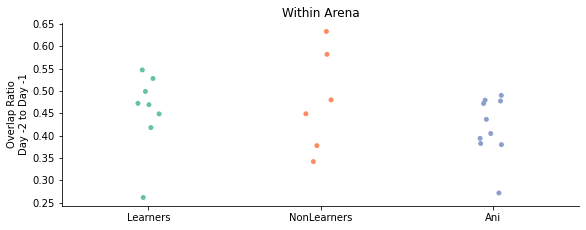

In [5]:
pfg.turnover_scatter(-2, -1, within_arena=True)

It seems the first-pass answer is NO, there appears to be no difference between groups based on cell turnover from day -2 to day -1.

One prediction, based on the idea that anisomycin prevents any learning-related plasticity, is that 2d correlations should be HIGHER for ANI vs non-ANI mice following anisomycin administration.  

NaNs detected in data - check!
NaNs detected in data - check!


array([<AxesSubplot:title={'center':'Learners: PV2dboth at optimal rotation'}>,
       <AxesSubplot:title={'center':'Nonlearners: PV2dboth at optimal rotation'}>,
       <AxesSubplot:title={'center':'Ani: PV2dboth at optimal rotation'}>],
      dtype=object)

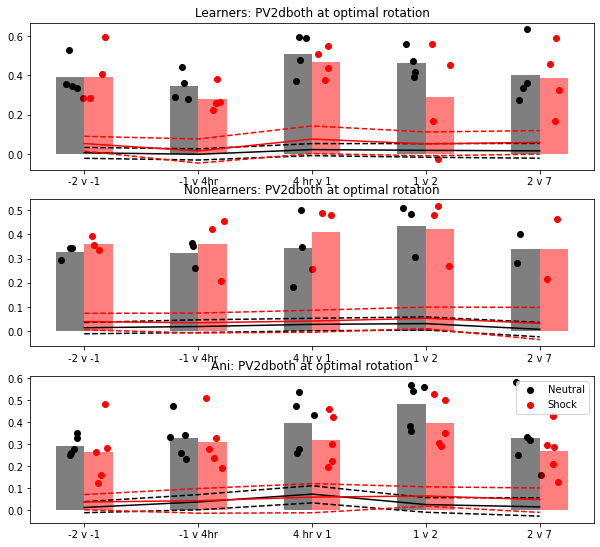

In [6]:
pfg.scatterbar_bw_days(type='PV2dboth')

This does not seem to hold out from the above, however, since by eye the ANI correlations (bottom row) are at best equal to the other groups.

However, maybe this is because we are comparing between time points when plasticity has already occurred: for day -1 to day 4, lots of changes have already occurred from day -1 to day 0 time points.  Same thing for time points after anisomycin administration. Maybe the key time point is day 0 to 4hr, or better yet, day 0 to day 1, sessions?  We only have this data for open field, however.

NaNs detected in data - check!
NaNs detected in data - check!
NaNs detected in data - check!
NaNs detected in data - check!
NaNs detected in data - check!


array([<AxesSubplot:title={'center':'Learners: PV2dboth at optimal rotation'}>,
       <AxesSubplot:title={'center':'Nonlearners: PV2dboth at optimal rotation'}>,
       <AxesSubplot:title={'center':'Ani: PV2dboth at optimal rotation'}>],
      dtype=object)

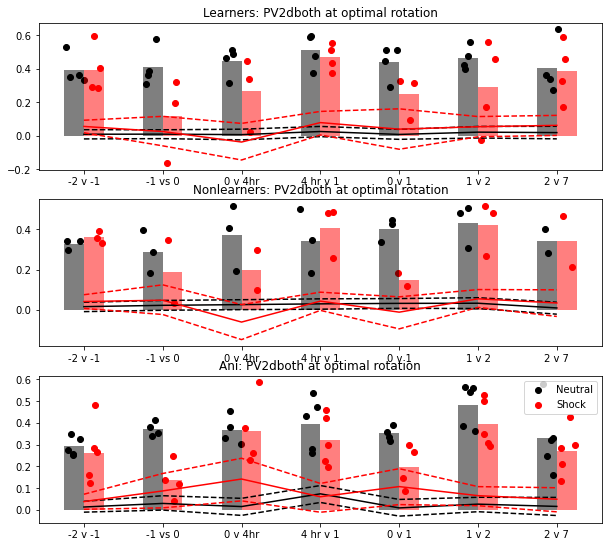

In [7]:
pfg.scatterbar_bw_days(type='PV2dboth', include_dayzero=True)

Ok, this does not seem to pan out either.  The -1 v 0 and 0 v 1 comparisons are basically the same between all groups.  Keep in mind that any red dots in these comparisons are not legit as the mice only spend 60 second in the shock arena on day 0.

That being said, what might be interesting is that there seems to be a higher correlation between the 0 and 4 hour session for the shock arena, even despite there being very little data in the 0 hour session.  Need to think on whether or not this is a legitimate comparison.

One related question is: is cell turnover between arenas related to cell turnover across days? One could imagine that some mice simply have faster turnover of cells in general, and that as a result, they inherently have less similar cellulary activity between any pair of sessions, including between arenas on a given day.

As far as I know, this has not been shown before.

Spearman Correlation
r = 0.5604395604395606
p = 0.04634590589406461


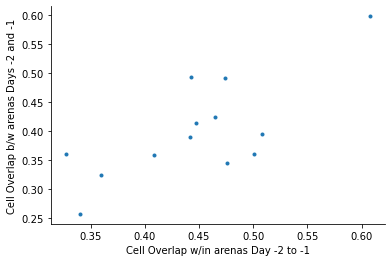

In [8]:
from eraser_reference import all_mice_good

overlap_win, overlap_bw = [], []
for mouse in all_mice_good:
    # Get turnover between arenas on days -2 and -1 and average them
    o_bw_temp = []
    for day in [-2, -1]:
        _, _, oboth, _, _ = placefield_stability.get_overlap(mouse, 'Open', day, 'Shock', day, batch_map=True)
        o_bw_temp.append(oboth)
    overlap_bw.append(np.mean(o_bw_temp))
    
    # Get turnover within each arena from days -2 to -1 and average them
    o_win_temp = []
    for arena in ['Shock', 'Open']:
        _, _, oboth, _, _ = placefield_stability.get_overlap(mouse, arena, -2, arena, -1, batch_map=True)
        o_win_temp.append(oboth)
    overlap_win.append(np.mean(o_win_temp))

fig, ax = plt.subplots()
ax.plot(overlap_win, overlap_bw, '.')
ax.set_xlabel('Cell Overlap w/in arenas Day -2 to -1')
ax.set_ylabel('Cell Overlap b/w arenas Days -2 and -1')
sns.despine(ax=ax)

# Looks like there is a significant correlation with all the points
r, p = stats.spearmanr(overlap_bw, overlap_win)
print('\033[4mSpearman Correlation\033[0m')
print('r = ' + str(r))
print('p = ' + str(p))

Ok, that's pretty cool. There seems to be a pretty nice relationship here. Is it still there if we get rid of that one crazy outlier point in the upper-right.  Has this been shown anywhere before? Seriously, I thought Rubin et al. 2015 maybe but it doesn't appear so...

In [9]:
# This goes away when I remove that outlier
imax = np.argmax(overlap_bw)
npts = len(overlap_bw)
good_bool = np.ones(npts).astype('bool')
good_bool[imax] = 0
r2, p2 = stats.spearmanr(np.asarray(overlap_bw)[good_bool], np.asarray(overlap_win)[good_bool])
print('\033[4mSpearman Correlation\033[0m')
print('r = ' + str(r2))
print('p = ' + str(p2))

Spearman Correlation
r = 0.44055944055944063
p = 0.15173503571673022


Ok, so there definitely is a trend but only with that one outlier point.  Maybe I can get more statistical power by combining with data coming from AFTER learning too, say days 1 to 2?

# Potential figure plot here

No neural data for Marble14: 8/18/2018-s1
Spearman Correlation
r = 0.7347008547008547
p = 1.9205609505225188e-05


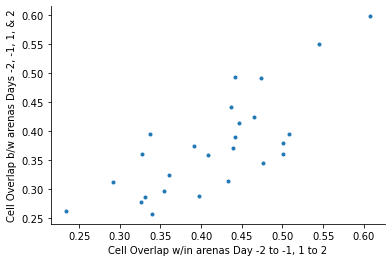

In [10]:
overlap_win_all, overlap_bw_all = [], []
day_pairs = [[-2, -1], [1, 2]]
for mouse in all_mice_good:
    # Get turnover between arenas on days -2 and -1 and average them
    o_bw_temp = []
    o_win_temp = []
    for day_pair in day_pairs:
        for day in day_pair:
            _, _, oboth, _, _ = placefield_stability.get_overlap(mouse, 'Open', day, 'Shock', day, batch_map=True)
            o_bw_temp.append(oboth)
        overlap_bw_all.append(np.nanmean(o_bw_temp))

        # Get turnover within each arena from days -2 to -1 and average them

        for arena in ['Shock', 'Open']:
            _, _, oboth, _, _ = placefield_stability.get_overlap(mouse, arena, day_pair[0], arena, day_pair[1], batch_map=True)
            o_win_temp.append(oboth)
        overlap_win_all.append(np.nanmean(o_win_temp))
        
fig, ax = plt.subplots()
ax.plot(overlap_win_all, overlap_bw_all, '.')
ax.set_xlabel('Cell Overlap w/in arenas Day -2 to -1, 1 to 2')
ax.set_ylabel('Cell Overlap b/w arenas Days -2, -1, 1, & 2')
sns.despine(ax=ax)

# Super significant correlation with all the points
r, p = stats.spearmanr(overlap_win_all, overlap_bw_all)
print('\033[4mSpearman Correlation\033[0m')
print('r = ' + str(r))
print('p = ' + str(p))

Spearman Correlation
r = 0.6521739130434784
p = 0.0010049095006007711


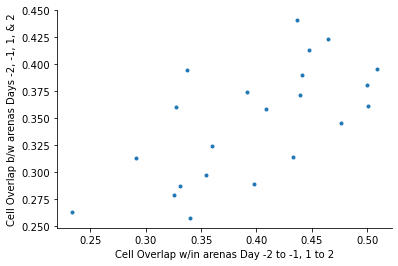

In [11]:
# Cool, still very significant even if I exclude 4 biggest points
ioutlier = np.where(np.asarray(overlap_bw_all) > 0.47)[0]
npts = len(overlap_bw_all)
good_bool = np.ones(npts).astype('bool')
good_bool[ioutlier] = 0
r2, p2 = stats.spearmanr(np.asarray(overlap_win_all)[good_bool], np.asarray(overlap_bw_all)[good_bool])

fig, ax = plt.subplots()
ax.plot(np.asarray(overlap_win_all)[good_bool], np.asarray(overlap_bw_all)[good_bool], '.')
ax.set_xlabel('Cell Overlap w/in arenas Day -2 to -1, 1 to 2')
ax.set_ylabel('Cell Overlap b/w arenas Days -2, -1, 1, & 2')
sns.despine(ax=ax)

print('\033[4mSpearman Correlation\033[0m')
print('r = ' + str(r2))
print('p = ' + str(p2))

# NRK todo: fold the above code into a function in PFGroup for easy plotting.